# AI Computer Assignment 5 Phase 1 (Feed Forward Neural Network)
Mohammad Saadati - 
_810198410_

## Introduction
In this project, we implement **Feed Forward neural networks** to classify images.

In Feed Forward neural networks, each image is first flattened and given as a vector as Feed Forward in the input neural networks. Each element of this vector (equivalent to one pixel of the image) is a property for it. Based on these properties and by making nonlinear combinations of them, the network is supposed to adjust the weight of the connections between its layers so that With the least error, correctly predict the corresponding input image class.

In this assignment we will work with a set of `Persian` handwritten numbers. The data set includes images from 10 digits 0 to 9 in Persian. There are a total of 102352 images in this dataset. You can read more about the data set and the number of images of each digit in the data set [here](http://farsiocr.ir/%D9%85%D8%AC%D9%85%D9%88%D8%B9%D9%87-%D8%AF%D8%A7%D8%AF%D9%87/%D9%85%D8%AC%D9%85%D9%88%D8%B9%D9%87-%D8%A7%D8%B1%D9%82%D8%A7%D9%85-%D8%AF%D8%B3%D8%AA%D9%86%D9%88%DB%8C%D8%B3-%D9%87%D8%AF%DB%8C/).

### Import Libraries
In this part, some of the necessary libraries were imported in order to use their helpful functions.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import cv2

In [98]:
data_pkl_file = open("./dataset/data.pkl", 'rb')
data = pickle.load(data_pkl_file)

labels_pkl_file = open("./dataset/labels.pkl", 'rb')
labels = pickle.load(labels_pkl_file)

## Phase 1: Data review and preprocessing
Data splitting is an important phase, If we use whole data for both train and test our mesurments may not be precise,
because there may be overfitting on train data.
So we can split our data to train/test to handle this challenge, but again there is another problem.
First of all we have to divide our dataset to two parts trainset and testset so by using `train_test_split` method of `sklearn` and setting `test_size` we'll determine what percentage of our data is for test. For the division `train_test_split` fucntions from `sklearn.model_selection` is used which returns 4 dataset likes. Two are for the training data and two are for test data. And the dependent variable which here is the `type` feature.

The `P` ratio depends on lots of metrics but two important metrics to mention are the number of rows in our data and our data itself.
Assume that we have extremely small data in this situations small p may effect our learning accuracy.
In larger datasets we can do the split with more confidence. After reading some documents online I came to the understanding that 10% to 30% is a good percentage for test size and by experimenting different values I decided to use the value 20%.

Another important note to mention is randomness. We must shuffle our data so there is no learning from the sequence of data itself.
`random_state` is for getting the same set of data each time so that we don't get different results, meaning it won't give us random data each time. `random_state` is like the seed that we set for random. 

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(data , labels , test_size = 0.20 , random_state = 42)

### Question 1:
First, we randomly check and display an image in the train dataset

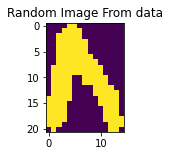


Minimum value in image: 0
Maximum value in image: 255


In [100]:
image = X_train[random.randint(0 , len(X_train) - 1)]

plt.figure(figsize = (2,2))
plt.imshow(image)
plt.title("Random Image From data")
plt.show()

print("\nMinimum value in image: " + str(np.amin(image)))
print("Maximum value in image: " + str(np.amax(image)))

As shown above image values in the dataset which represent the brightness of each pixel is a number between 0 to 255.

### Question 2:
Now resize the images to $25 * 25$. To do this, we use the `resize` function

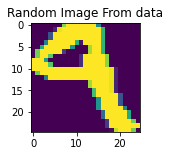


Minimum value in image: 0
Maximum value in image: 255


In [101]:
# X_train = [np.resize(image,(25 , 25)) for image in X_train]
# X_test = [np.resize(image,(25 , 25)) for image in X_test]

X_train = [cv2.resize(image, dsize=(25 , 25), interpolation=cv2.INTER_CUBIC) for image in X_train]
X_test = [cv2.resize(image, dsize=(25 , 25), interpolation=cv2.INTER_CUBIC) for image in X_test]

image = X_train[random.randint(0 , len(X_train) - 1)]

plt.figure(figsize = (2 , 2))
plt.imshow(image)
plt.title("Random Image From data")
plt.show()

print("\nMinimum value in image: " + str(np.amin(image)))
print("Maximum value in image: " + str(np.amax(image)))

### Question 3:
In this part, we select and display an image of each class in the train data set. For each image, we display its type along with the image.

========== CLASS No. 0 ==========


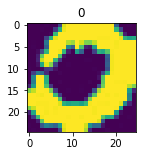

========== CLASS No. 1 ==========


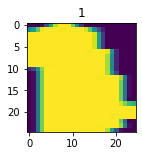

========== CLASS No. 2 ==========


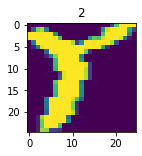

========== CLASS No. 3 ==========


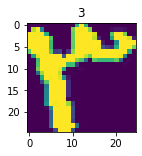

========== CLASS No. 4 ==========


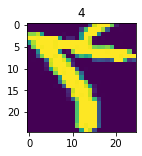

========== CLASS No. 5 ==========


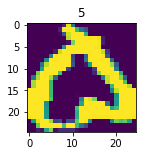

========== CLASS No. 6 ==========


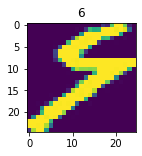

========== CLASS No. 7 ==========


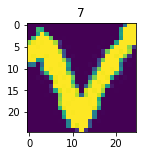

========== CLASS No. 8 ==========


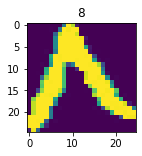

========== CLASS No. 9 ==========


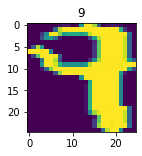

In [102]:
for i in range(0,10):
    index = 0
    while Y_train[index] != i:
        index += 1
    image = X_train[index]
    print("========== CLASS No.",str(i),"==========")
    plt.figure(figsize = (2 , 2))
    plt.imshow(image)
    plt.title(i)
    plt.show()

### Question 4:
Now calculate the number of images in each category for the test and train datasets and draw a bar chart for them.

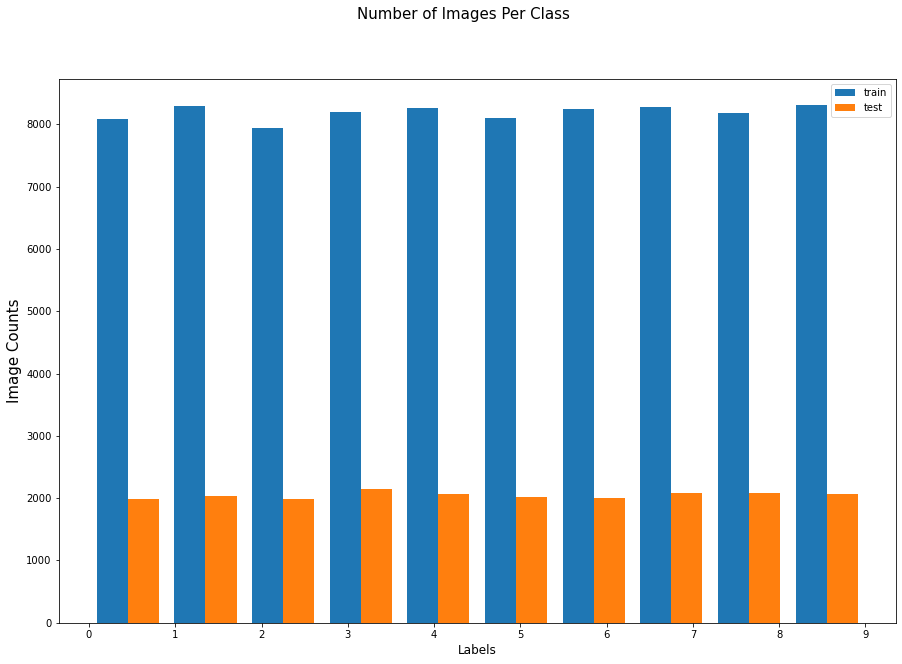

In [103]:
fig = plt.figure(figsize=(15, 10))
plt.hist((Y_train, Y_test), label=['train', 'test'])
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Image Counts', fontsize = 15)
plt.suptitle('Number of Images Per Class', fontsize = 15)
plt.legend()
plt.xticks(range(0,10))
plt.show()

### Question 5:
In this section, scale the amount of data so that the value of each pixel is between 0 and 1 before giving information to the neural network. 

Normalization refers to rescaling real valued numeric attributes into the range 0 and 1. Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.Since maximum value in the dataset is 255 it's a good idea to divide every value in the dataset by 255, this will result in each value being between 0 to 1. The reason that this procedure is done is that higher numbers in the network will make it biased meaning that since the difference between values in the range of 0 to 255 is a lot the effect of a value like 1 can easily be vanished comapred to 255 so it's a wise move to scale the values down to make each of them have somewhat of a equal impact in the network. Biased network can result in lower accuracy and all in all a poor model.

In [104]:
X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)

X_train = X_train / 255
X_test = X_test / 255

## Phase 2: Completing the incomplete parts of given Code for the Neural Network

### Dataloader

In [105]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        onehot_vectors = pd.DataFrame(OneHotEncoder().fit_transform(labels).toarray())
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        rp = np.random.permutation(len(self.__data))
        self.__data = self.__data[rp]
        self.__onehot_labels = self.__onehot_labels[rp]
    
    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

### Activation Functions
In this part, we completed _val_ and *derivative* methods of activation function classes.

An activation function defines how the weighted sum of the layer input is transformed into an output from a node/s in the network.

We used the following formulas to implement these activation functions:

$$  Identical(x) = x \quad \text{and} \quad Identical'(x) = 1 $$

$$ 
Relu(x) = \begin{cases} x & x \geq 0\\
0 & x < 0 \end{cases}  \quad \text{and} \quad 
Relu'(x) = \begin{cases} 1 & x \geq 0\\
0 & x < 0 \end{cases} 
$$

$$ 
LeakyRelu(x) = \begin{cases} x & x \geq 0\\
\text{negative_slope}*x & x < 0 \end{cases} \quad \text{and} \quad 
LeakyRelu'(x) = \begin{cases} 1 & x \geq 0\\
\text{negative_slope} & x < 0 \end{cases} 
$$

$$ 
Sigmoid(x) = \frac{1}{1+e^{-x}} \quad \text{and} \quad 
Sigmoid'(x) = Sigmoid(x)(1-Sigmoid(x)) 
$$

$$ 
Softmax(x : matrix) = \frac{e^x_i}{\sum_{j=1}^{J} e^x_j}  \quad for \quad i = 1,...,Z \quad and \quad x = (x_1, x_2,...,x_Z)
$$

$$ 
Tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} \quad \text{and} \quad 
Tanh'(x) = 1-Tanh(x)^2 
$$

In [146]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self):
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        relu_value = np.matrix(np.maximum(temp, 0.))
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[relu_derivative < 0] = 0.0
        relu_derivative[relu_derivative >= 0] = 1.0
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_value = np.matrix(np.where(temp >= 0, temp, temp * self.negative_slope))
        return leacky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        leaky_relu_derivative = np.matrix(np.full(np.shape(temp), np.where(temp < 0.0, self.negative_slope, 1.0)))
        return leaky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): 
        pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        sigmoid_value = np.matrix(1.0/(1.0 + np.exp(-temp)))
        return sigmoid_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        sigmoid_derivative = np.multiply(self.__val(temp), (1. - self.__val(temp)))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        softmax_value = np.exp(temp - np.max(temp))
        softmax_value /= softmax_value.sum(axis=1)
        return softmax_value
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): 
      '''
      This is the constructor. It does not have any fields
      as a result, there is no need to do anything in the constructor.
      '''
      pass

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        tanh_value = np.matrix((np.exp(temp) - np.exp(-temp))/(np.exp(temp) + np.exp(-temp)))
        return tanh_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        tanh_derivative = 1. - np.power(self.__val(temp), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

### Loss Function
In this part, we completed _val_ and *derivative* methods of CrossEntropy classes. It is assumed that `Sofmax` is applied before using the following formulas.
$$ CrossEntropy(y, \hat y) = -\sum_{i} y_i \log{\hat y_i} $$

$$ CrossEntropy'(y, \hat y) = y - \hat y $$

In [107]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
    
        true_val_mat = np.matrix(true_val, dtype=float)
        cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)

        true_val_mat = np.matrix(true_val, dtype=float)                          
        cross_entropy_derivative = Softmax()(true_val_mat) - np.matrix(expected_val, dtype=float)                                 
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

### Layer
In this part, we completed _forward_, *update_weights*, *uniform_weight*, and *normal_weight* methods of Layer class. 

We used the following formulas to update weights at the end of each batch:

$$ \frac{\partial L}{\partial W} = x^T\frac{\partial L}{\partial y} $$

$$ \frac{\partial L}{\partial b} = 1\frac{\partial L}{\partial y} $$

$$ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y}W^T $$

In [108]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        self.__last_input = np.matrix(layer_input, dtype=float)
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
    
        ones = np.matrix(np.ones((np.size(backprop_tensor,axis=0), 1)))
        dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
        backprop_tensor = np.matmul(dy, np.transpose(self.__weight))
        self.__bias -= lr * np.matmul(ones.T, dy)
        self.__weight -= lr * np.matmul(self.__last_input.T, dy)
        return backprop_tensor
        

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']

        weights = np.matrix(np.random.uniform(low, high=high, size=(dim1, dim2)))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']

        weights = np.matrix(np.random.normal(loc=mean, scale=var, size=(dim1, dim2)))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

### Feed Forward Neural Network

In [109]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"

        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        network_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(y_batch, network_output)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))
        self.__update_weights(network_output, y_batch) 
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        network_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(network_output, y_batch)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        labels = np.argmax(outputs, axis = 1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        accuracy = np.count_nonzero(self.__get_labels(output) == self.__get_labels(expected_output)) / np.size(output, 0) * 100
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        backprop_tensor = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            backprop_tensor = layer.update_weights(backprop_tensor, self.__lr)
        return

## Phase 3: Data Classification
In this phase, we will implement and train Feed Forward neural networks with different parameters using the `FeedForwardNN` class.

In [110]:
def expand_pixels_numbers(inp):
    r = []
    for i in inp:
        rr = []
        for j in i:
            for k in j:
                rr.append(k)
        r.append(rr)
    return r

In [111]:
X_train, X_test = expand_pixels_numbers(X_train.tolist()), expand_pixels_numbers(X_test.tolist())

In [112]:
X_train = pd.DataFrame(data=X_train, columns=["PixelNo. %i" % x for x in range(1, 25*25 + 1)])
X_test = pd.DataFrame(data=X_test, columns=["PixelNo.%i" % x for x in range(1, 25*25 + 1)])

In [113]:
Y_train = pd.DataFrame(data=Y_train.tolist(), columns=["labels"])
Y_test = pd.DataFrame(data=Y_test.tolist(), columns=["labels"])

### Training Sample Code

In [114]:
# Sample code for building and training a model

INPUT_SHAPE = 25*25
LEARNING_RATE = 0.001
EPOCHS = 15
BATCH_SIZE = 32

TRAINLOADER = [batch for batch in Dataloader(X_train, Y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(X_test, Y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

In [119]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

In [120]:
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 90.25376123485736	Average Loss: 0.3847507155842545
	Test: Average Accuracy: 95.40336277173913	Average Loss: 0.16517450651996887
Epoch 2:
	Train: Average Accuracy: 95.92858538491598	Average Loss: 0.14607685632193385
	Test: Average Accuracy: 96.09183933423913	Average Loss: 0.1411680770126691
Epoch 3:
	Train: Average Accuracy: 96.43293278624462	Average Loss: 0.12781926650468778
	Test: Average Accuracy: 96.39945652173913	Average Loss: 0.12976647168762795
Epoch 4:
	Train: Average Accuracy: 96.6857170769832	Average Loss: 0.1175970304556995
	Test: Average Accuracy: 96.58500339673913	Average Loss: 0.12378535091928833
Epoch 5:
	Train: Average Accuracy: 96.87866354044549	Average Loss: 0.11112524466371168
	Test: Average Accuracy: 96.72660495923913	Average Loss: 0.12027969300025414
Epoch 6:
	Train: Average Accuracy: 96.98700664322001	Average Loss: 0.10666944247178473
	Test: Average Accuracy: 96.79008152173913	Average Loss: 0.11809938645626379
Epoch 7:
	Train: Ave

### Part I: Network training

The neural network that I implemented consists of `1` input layer, `1` hidden layer and `1` output layer. `625` input nodes, `45` hidden nodes and `10` output nodes corresponding to `10` labels that we have.

I have tried higher number of hidden nodes and it'll result in higher accuracy.

In [121]:
INPUT_SHAPE = 25*25
LEARNING_RATE = 0.00003
EPOCHS = 15
BATCH_SIZE = 32

print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
# network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  3e-05 

Epoch 1:
	Train: Average Accuracy: 23.289566236811254	Average Loss: 2.0736098020554894
	Test: Average Accuracy: 55.7963230298913	Average Loss: 1.6387305587625103
Epoch 2:
	Train: Average Accuracy: 72.89385502149277	Average Loss: 1.1497983239585663
	Test: Average Accuracy: 80.40463654891305	Average Loss: 0.800214571363633
Epoch 3:
	Train: Average Accuracy: 83.68088120359515	Average Loss: 0.6359390133996106
	Test: Average Accuracy: 85.61353600543478	Average Loss: 0.5249838467810047
Epoch 4:
	Train: Average Accuracy: 86.9527647518562	Average Loss: 0.4570189281297503
	Test: Average Accuracy: 88.29122792119566	Average Loss: 0.4081770419265366
Epoch 5:
	Train: Average Accuracy: 89.26289566236811	Average Loss: 0.36835420370536626
	Test: Average Accuracy: 90.14266304347827	Average Loss: 0.3421507959017568
Epoch 6:
	Train: Average Accuracy: 91.09222352481439	Average Loss: 0.31479696836332105
	Test: Average Accuracy: 91.48246433423913	Average Loss: 0.30068412701764424
Ep

### Part II : Network Weighting

If zero initial weights are chosen, then the learning rate has no influence on a neuron's predicted class label. If you initialize all weights with zeros then every hidden unit will get zero independent of the input since the weight matrix is all zeros and multiplication will result in zero. So, when all the hidden neurons start with the zero weights, then all of them will follow the same gradient and for this reason starting with zeros affects only the scale of the weight vector, not the direction. Also, having zero weights to start with will prevent the network from learning. The errors backpropagated through the network is proportional to the value of the weights. If all the weights are the same, then the backpropagated errors will be the same, so all of the weights will be updated by the same amount which means the whole process was useless. To avoid this problem, the initial weights of the network should be unequal a way of doing this is to assign random values to weights.

In [133]:
LEARNING_RATE = 0.001

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='zero')
# network.add_layer(40, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='zero')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 90.17682688550215	Average Loss: 0.38364604410908426
	Test: Average Accuracy: 95.33988620923913	Average Loss: 0.16878484023433798
Epoch 2:
	Train: Average Accuracy: 95.91637358343102	Average Loss: 0.1490250460965128
	Test: Average Accuracy: 95.96488620923913	Average Loss: 0.14629975487150587
Epoch 3:
	Train: Average Accuracy: 96.36332551778038	Average Loss: 0.13202452831262837
	Test: Average Accuracy: 96.26273777173913	Average Loss: 0.1360529592766703
Epoch 4:
	Train: Average Accuracy: 96.6295427901524	Average Loss: 0.1223523085913539
	Test: Average Accuracy: 96.44828464673913	Average Loss: 0.12957372090015856
Epoch 5:
	Train: Average Accuracy: 96.76997850722938	Average Loss: 0.11565806597194758
	Test: Average Accuracy: 96.57035495923913	Average Loss: 0.12502189327395888
Epoch 6:
	Train: Average Accuracy: 96.88354826103946	Average Loss: 0.11058329464724916
	Test: Average Accuracy: 96.66312839673913	Average Loss: 0.1216738106039144
Epoch 7:
	Train: Aver

### Part III : Impact of learning rate

In this section, by decreasing and increasing the `learning rate` parameter, we will train the network and find the optimal value for our network

The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

In [123]:
LEARNING_RATE = 0.00001
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  1e-05 

Epoch 1:
	Train: Average Accuracy: 10.591441969519343	Average Loss: 2.2466900533232654
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.2089612944835153
Epoch 2:
	Train: Average Accuracy: 16.028819851504494	Average Loss: 2.1295537790917654
	Test: Average Accuracy: 19.875806725543477	Average Loss: 2.0223153030143104
Epoch 3:
	Train: Average Accuracy: 45.53648886283705	Average Loss: 1.8388027538432543
	Test: Average Accuracy: 63.32668138586956	Average Loss: 1.6391340213917907
Epoch 4:
	Train: Average Accuracy: 67.99135404454866	Average Loss: 1.43469815919188
	Test: Average Accuracy: 73.45639436141305	Average Loss: 1.2545685322308633
Epoch 5:
	Train: Average Accuracy: 76.39375732708089	Average Loss: 1.1028172981289395
	Test: Average Accuracy: 78.30502717391305	Average Loss: 0.9768053163423216
Epoch 6:
	Train: Average Accuracy: 80.36381398983978	Average Loss: 0.8724730893094429
	Test: Average Accuracy: 81.2073284646739	Average Loss: 0.7896508912287777
Epo

In [124]:
LEARNING_RATE = 0.00005
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  5e-05 

Epoch 1:
	Train: Average Accuracy: 41.808372411098084	Average Loss: 1.7554768104982963
	Test: Average Accuracy: 76.28354279891305	Average Loss: 0.9674776260524347
Epoch 2:
	Train: Average Accuracy: 82.80075224697147	Average Loss: 0.6562929152283555
	Test: Average Accuracy: 86.20923913043478	Average Loss: 0.48307906069369394
Epoch 3:
	Train: Average Accuracy: 88.22034974599453	Average Loss: 0.40204203973018254
	Test: Average Accuracy: 89.96008831521739	Average Loss: 0.346350705671976
Epoch 4:
	Train: Average Accuracy: 91.29684447049628	Average Loss: 0.30628005100672434
	Test: Average Accuracy: 92.00980808423913	Average Loss: 0.28280734674927305
Epoch 5:
	Train: Average Accuracy: 92.77691481047285	Average Loss: 0.25861911864489223
	Test: Average Accuracy: 92.97660495923913	Average Loss: 0.2492068630300055
Epoch 6:
	Train: Average Accuracy: 93.5441578741696	Average Loss: 0.23164872485689308
	Test: Average Accuracy: 93.44535495923913	Average Loss: 0.228676854309811

In [126]:
LEARNING_RATE = 0.00010
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0001 

Epoch 1:
	Train: Average Accuracy: 62.15792301680344	Average Loss: 1.1977544967105684
	Test: Average Accuracy: 86.7786175271739	Average Loss: 0.459590419361643
Epoch 2:
	Train: Average Accuracy: 90.07932786244626	Average Loss: 0.3432977172325228
	Test: Average Accuracy: 92.20023777173913	Average Loss: 0.2781754992341346
Epoch 3:
	Train: Average Accuracy: 93.16036537710043	Average Loss: 0.244558237709375
	Test: Average Accuracy: 93.47465183423913	Average Loss: 0.22825997548718985
Epoch 4:
	Train: Average Accuracy: 94.06193825713169	Average Loss: 0.20958440806090203
	Test: Average Accuracy: 94.08500339673913	Average Loss: 0.2046119031271985
Epoch 5:
	Train: Average Accuracy: 94.59559398202423	Average Loss: 0.19086564398252523
	Test: Average Accuracy: 94.50004245923913	Average Loss: 0.19026576720988492
Epoch 6:
	Train: Average Accuracy: 94.96927510746386	Average Loss: 0.1787475132347079
	Test: Average Accuracy: 94.89555027173913	Average Loss: 0.18046471693702548


In [127]:
LEARNING_RATE = 0.00015
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.00015 

Epoch 1:
	Train: Average Accuracy: 68.92936694021103	Average Loss: 0.9595695082543022
	Test: Average Accuracy: 89.65140964673913	Average Loss: 0.3475968967364872
Epoch 2:
	Train: Average Accuracy: 92.29210629152013	Average Loss: 0.2694313441303663
	Test: Average Accuracy: 93.33793308423913	Average Loss: 0.22966303800696503
Epoch 3:
	Train: Average Accuracy: 94.09368894099258	Average Loss: 0.20599775100324075
	Test: Average Accuracy: 94.20707370923913	Average Loss: 0.19701528531536525
Epoch 4:
	Train: Average Accuracy: 94.8215123094959	Average Loss: 0.18216087254358487
	Test: Average Accuracy: 94.81742527173913	Average Loss: 0.18049607738869927
Epoch 5:
	Train: Average Accuracy: 95.20530480656507	Average Loss: 0.16873350952007266
	Test: Average Accuracy: 95.13969089673913	Average Loss: 0.17029152206729656
Epoch 6:
	Train: Average Accuracy: 95.48251270027355	Average Loss: 0.15984030652944523
	Test: Average Accuracy: 95.38383152173913	Average Loss: 0.16323490376

In [134]:
LEARNING_RATE = 0.00025
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.00025 

Epoch 1:
	Train: Average Accuracy: 77.01025791324736	Average Loss: 0.7274639370868651
	Test: Average Accuracy: 92.99125339673913	Average Loss: 0.2463735688300897
Epoch 2:
	Train: Average Accuracy: 94.03751465416178	Average Loss: 0.2082062464261714
	Test: Average Accuracy: 94.46097995923913	Average Loss: 0.19142385550284596
Epoch 3:
	Train: Average Accuracy: 95.01357952325127	Average Loss: 0.1747389508045845
	Test: Average Accuracy: 95.10062839673913	Average Loss: 0.17204388836391654
Epoch 4:
	Train: Average Accuracy: 95.51059984368894	Average Loss: 0.1597833812909417
	Test: Average Accuracy: 95.46195652173913	Average Loss: 0.16142150059789717
Epoch 5:
	Train: Average Accuracy: 95.79669792887847	Average Loss: 0.1506373131370737
	Test: Average Accuracy: 95.67680027173913	Average Loss: 0.15440997790840885
Epoch 6:
	Train: Average Accuracy: 96.01162563501367	Average Loss: 0.14417608796457088
	Test: Average Accuracy: 95.83793308423913	Average Loss: 0.1492910915706

In [135]:
LEARNING_RATE = 0.0005
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0005 

Epoch 1:
	Train: Average Accuracy: 84.89087534193044	Average Loss: 0.5352639300004786
	Test: Average Accuracy: 94.51957370923913	Average Loss: 0.19505098645459523
Epoch 2:
	Train: Average Accuracy: 95.20808909730363	Average Loss: 0.17051989390121577
	Test: Average Accuracy: 95.53519870923913	Average Loss: 0.16324918648764064
Epoch 3:
	Train: Average Accuracy: 95.8675263774912	Average Loss: 0.14952086514737892
	Test: Average Accuracy: 95.81840183423913	Average Loss: 0.15031617903941735
Epoch 4:
	Train: Average Accuracy: 96.18503321610004	Average Loss: 0.1388704727029377
	Test: Average Accuracy: 96.05277683423913	Average Loss: 0.14266869335959992
Epoch 5:
	Train: Average Accuracy: 96.37553731926533	Average Loss: 0.13185901598019767
	Test: Average Accuracy: 96.16508152173913	Average Loss: 0.13740153757316256
Epoch 6:
	Train: Average Accuracy: 96.5220789370848	Average Loss: 0.12667065176325495
	Test: Average Accuracy: 96.33109714673913	Average Loss: 0.133472801449

In [136]:
LEARNING_RATE = 0.0015
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0015 

Epoch 1:
	Train: Average Accuracy: 91.94143220007815	Average Loss: 0.325068516506477
	Test: Average Accuracy: 95.58890964673913	Average Loss: 0.15626129210516837
Epoch 2:
	Train: Average Accuracy: 96.02627979679562	Average Loss: 0.13894698069321704
	Test: Average Accuracy: 96.14066745923913	Average Loss: 0.13854673481605756
Epoch 3:
	Train: Average Accuracy: 96.42926924579913	Average Loss: 0.12532564290555218
	Test: Average Accuracy: 96.32133152173913	Average Loss: 0.13100460034645373
Epoch 4:
	Train: Average Accuracy: 96.60878272762798	Average Loss: 0.11781699908944834
	Test: Average Accuracy: 96.37015964673913	Average Loss: 0.12674171425172592
Epoch 5:
	Train: Average Accuracy: 96.75654552559594	Average Loss: 0.1129938322486753
	Test: Average Accuracy: 96.46484375	Average Loss: 0.12475506256741946
Epoch 6:
	Train: Average Accuracy: 96.82371043376318	Average Loss: 0.1098713917400154
	Test: Average Accuracy: 96.4599609375	Average Loss: 0.12456947879103215
Epoc

In [137]:
LEARNING_RATE = 0.0035
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0035 

Epoch 1:
	Train: Average Accuracy: 9.945095740523643	Average Loss: 2.3386514186297283
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142402
Epoch 2:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 3:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 4:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 5:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 6:
	Train: Average Accuracy: 9.919450957405237	Average Loss: 2.3033473519251104
	Test: Average Accuracy: 9.8291015625	Average Loss: 2.3030106611142407
Epoch 7:
	Train: Average Accurac

By checking multiple values for learning rate, optimal `learning rate` was around $0.0005$

**Learning Rate * 0.1**

Now, when we multiplied the optimum learning rate by 0.1, the speed of the learning process decreased and it seems that we need more epochs to converge to the highest accuracy.

In [139]:
LEARNING_RATE = 0.0005 * 0.1
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  5e-05 

Epoch 1:
	Train: Average Accuracy: 41.22552754982415	Average Loss: 1.7709733852909857
	Test: Average Accuracy: 75.64877717391305	Average Loss: 0.9664271336603859
Epoch 2:
	Train: Average Accuracy: 83.2550312622118	Average Loss: 0.6476271075822522
	Test: Average Accuracy: 86.78243885869566	Average Loss: 0.47261168655817887
Epoch 3:
	Train: Average Accuracy: 88.65596912856584	Average Loss: 0.3915423404001563
	Test: Average Accuracy: 90.36727241847827	Average Loss: 0.33702704137808287
Epoch 4:
	Train: Average Accuracy: 91.59202813599062	Average Loss: 0.29867778452229915
	Test: Average Accuracy: 92.25883152173913	Average Loss: 0.27696363501248045
Epoch 5:
	Train: Average Accuracy: 93.00405431809301	Average Loss: 0.2540087304948382
	Test: Average Accuracy: 93.11332370923913	Average Loss: 0.2455606936666813
Epoch 6:
	Train: Average Accuracy: 93.60853849159828	Average Loss: 0.22873702539452612
	Test: Average Accuracy: 93.60160495923913	Average Loss: 0.2262356226051235

**Learning Rate * 10**

Now, when we multiplied the optimum learning rate by 10, we faced with the problem of dying *Relu* and its obvious because weight will increase and it can cuase in vanishing in gradients. We can see that there is a small change between accuracies of different epochs.

In [140]:
LEARNING_RATE = 0.0005 * 10
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.005 

Epoch 1:


<ipython-input-107-fd059bb00daf>:29: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-107-fd059bb00daf>:29: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-106-100292c5b0fb>:255: RuntimeWarning: invalid value encountered in true_divide
  softmax_value /= softmax_value.sum(axis=1)


	Train: Average Accuracy: 11.40230558812036	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 2:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 3:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 4:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 5:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 6:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 7:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 8:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average

If the learning rate is low, then training is more reliable, but optimization will take a lot of time because steps towards the minimum of the loss function are tiny. If the learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse.

### Part IV :  Impact of activation function

In this part, we measure the performance of the network designed in the first part using different *Activation Functions* and compare the results.

#### Sigmoid

In [149]:
LEARNING_RATE = 0.0005

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.008597108245409	Average Loss: 2.3077785097494017
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.3082613335348703
Epoch 2:
	Train: Average Accuracy: 10.079425556858148	Average Loss: 2.3074806790758844
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.3079029044434223
Epoch 3:
	Train: Average Accuracy: 10.151475185619383	Average Loss: 2.306946106222399
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.307059488690497
Epoch 4:
	Train: Average Accuracy: 11.53243454474404	Average Loss: 2.2972363430813316
	Test: Average Accuracy: 20.110181725543477	Average Loss: 2.209969634128515
Epoch 5:
	Train: Average Accuracy: 35.60829425556858	Average Loss: 1.885498043867659
	Test: Average Accuracy: 60.5570652173913	Average Loss: 1.520587147962552
Epoch 6:
	Train: Average Accuracy: 76.52808714341539	Average Loss: 1.1138553055345608
	Test: Average Accuracy: 87.29598335597827	Average Loss: 0.7675046415319997
Epoch 7:
	Train: Average Ac

#### Hyperbolic Tangent

In [150]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.029357170769831	Average Loss: 2.3079229399480825
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.3085443941909256
Epoch 2:
	Train: Average Accuracy: 10.030578350918328	Average Loss: 2.307928465864414
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.308542868877603
Epoch 3:
	Train: Average Accuracy: 10.030578350918328	Average Loss: 2.3079269102553512
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.308541283763291
Epoch 4:
	Train: Average Accuracy: 10.031799531066824	Average Loss: 2.307925285909991
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.3085396214502567
Epoch 5:
	Train: Average Accuracy: 10.031799531066824	Average Loss: 2.3079235735808648
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.308537860724168
Epoch 6:
	Train: Average Accuracy: 10.031799531066824	Average Loss: 2.307921749434429
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.308535974941563
Epoch 7:
	Train: Averag

#### Leaky ReLU

In [151]:
LEARNING_RATE = 0.0005

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 85.20437670965221	Average Loss: 0.5271404441120265
	Test: Average Accuracy: 94.37797214673913	Average Loss: 0.1929533664790133
Epoch 2:
	Train: Average Accuracy: 95.2447245017585	Average Loss: 0.16835723883015774
	Test: Average Accuracy: 95.50590183423913	Average Loss: 0.16088865423448015
Epoch 3:
	Train: Average Accuracy: 95.90904650254005	Average Loss: 0.14645126677361
	Test: Average Accuracy: 95.83305027173913	Average Loss: 0.14658863778564651
Epoch 4:
	Train: Average Accuracy: 96.330353653771	Average Loss: 0.13373014913246103
	Test: Average Accuracy: 96.17484714673913	Average Loss: 0.1360607215535538
Epoch 5:
	Train: Average Accuracy: 96.64297577178586	Average Loss: 0.12313682981831421
	Test: Average Accuracy: 96.46293308423913	Average Loss: 0.12702076608682178
Epoch 6:
	Train: Average Accuracy: 96.88843298163346	Average Loss: 0.11379863253678109
	Test: Average Accuracy: 96.73637058423913	Average Loss: 0.11908866460878716
Epoch 7:
	Train: Average 

#### Why Sigmoid and Tanh do not work well?
In Tanh and Sigmoid moving towards the ends of the function, y values react very little to the changes in x so the derivative values in these regions are very small and converge to 0. This is called the vanishing gradient and the learning is minimal meaning that it makes the learning process be very slow or even useless. We know that if 0, not any learning. When slow learning occurs, the optimization algorithm that minimizes error can be attached to local minimum values and cannot get maximum performance from the artificial neural network model.

So by the explanation above Tanh and Sigmoid will result in vanishing gradient meaning that after a while the learning process will be very slow. So since we are using Stochastic Gradient Descent, these activation functions, Sigmoid and Tanh, won't be the best choice.

#### Why Leaky-Relu is better than Relu?
Unlike Relu, LeakyRelu is more balanced and may therefore learn faster. Also LeakyRelu fixes the dying Relu problem, as it doesn’t have zero-slope parts.

Dying relu problem: A Relu neuron is dead if it’s stuck in the negative side and always outputs 0. Because the slope of Relu in the negative range is also 0, once a neuron gets negative, it’s unlikely for it to recover. Such neurons are not playing any role in discriminating the input and is essentially useless. Over the time you may end up with a large part of your network doing nothing.

Since LeakyRelu assigns a small non zero value for negative parts this will result in solving the problem mentioned above and this is the main advantage of LeakyRelu.

LeakyRelu and Relu results are really close to each other but LeakyRelu result value is a bit higher so at the end I chose LeakyRelu.

### Part V : Impact of batch size

#### Setting Batch-Size to 16
In this part, when we set the `batch-size` to $16$, the speed of learning increased and our model reached to the desirable accuracy faster. It is obvious that the more batches we train our model, the more weight updates are performed and we get better results.

In [152]:
LEARNING_RATE = 0.0005 
print("Learning Rate = ", LEARNING_RATE, "\n")

BATCH_SIZE = 16
print("Batch Size = ", BATCH_SIZE, "\n")


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0005 

Batch Size =  16 

Epoch 1:
	Train: Average Accuracy: 85.10580304806565	Average Loss: 0.5266641673882863
	Test: Average Accuracy: 94.43168308423913	Average Loss: 0.1925196707357448
Epoch 2:
	Train: Average Accuracy: 95.26514263384135	Average Loss: 0.1671754029292132
	Test: Average Accuracy: 95.54496433423913	Average Loss: 0.15894760451333179
Epoch 3:
	Train: Average Accuracy: 96.00063501367721	Average Loss: 0.1438931018904264
	Test: Average Accuracy: 95.95023777173913	Average Loss: 0.14286003517962156
Epoch 4:
	Train: Average Accuracy: 96.45857756936303	Average Loss: 0.12996769015756285
	Test: Average Accuracy: 96.37504245923913	Average Loss: 0.1310467066240194
Epoch 5:
	Train: Average Accuracy: 96.77852676826886	Average Loss: 0.11891119766821706
	Test: Average Accuracy: 96.66801120923913	Average Loss: 0.12133601796990638
Epoch 6:
	Train: Average Accuracy: 97.07893708479875	Average Loss: 0.1094457486764115
	Test: Average Accuracy: 96.94144870923913	Average Los

#### Setting Batch-Size to 256
In this part, when we set the `batch-size` to $256$, the speed of learning decreased. So, it is better to use smaller batch size to make the process of learning faster.

In [153]:
BATCH_SIZE = 256
print("Batch Size = ", BATCH_SIZE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Batch Size =  256 

Epoch 1:
	Train: Average Accuracy: 85.29909144196952	Average Loss: 0.5214287919915146
	Test: Average Accuracy: 94.42191745923913	Average Loss: 0.19117149742914866
Epoch 2:
	Train: Average Accuracy: 95.30700468933178	Average Loss: 0.1671290001271131
	Test: Average Accuracy: 95.50590183423913	Average Loss: 0.15874431861776397
Epoch 3:
	Train: Average Accuracy: 95.94690308714341	Average Loss: 0.14486572671139394
	Test: Average Accuracy: 95.89164402173913	Average Loss: 0.1441408162200105
Epoch 4:
	Train: Average Accuracy: 96.3853067604533	Average Loss: 0.13133022521871365
	Test: Average Accuracy: 96.30668308423913	Average Loss: 0.13272362363720464
Epoch 5:
	Train: Average Accuracy: 96.72845838218053	Average Loss: 0.1202805056310188
	Test: Average Accuracy: 96.56547214673913	Average Loss: 0.12320623471736263
Epoch 6:
	Train: Average Accuracy: 97.02154161781947	Average Loss: 0.11062279059053258
	Test: Average Accuracy: 96.83890964673913	Average Loss: 0.11459790567688562
E

#### What is the reason for using batch in the training process?
The batch size defines the number of samples that will be propagated through the network.

* It requires less memory. As we train our network using fewer samples, the overall training process requires less memory. This is very important when we are not able to fit the whole dataset in our machine's memory.

* Typically networks train faster with mini-batches, because we update the weights after each propagation. If we used all samples during propagation, we would make only 1 update for the network's parameter and this can lead to underfitting.

#### What is the problem with extremely small batches?

There is no doubt that the smaller the batch is the less accurate the estimation of the gradient will be. If we use extremely small batch size, we would lose the effectiveness of vectorization. Moreover, It will produce a noisier gradient descent. As a result, we prefer to use bigger batch size.

Advantages of using a batch size instead of number of all samples are for instance choosing a batch size requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory. Typically networks train faster with batches. That's because we update the weights after each propagation. If we used all samples during propagation we would make only one update for the network's parameter meaning that the update won't occur frequently.

So the main advantage of dividing the whole dataset into batches and train the network with these batches is that parameter updates will happen frequently so the training process will be better also having batches will require less computation power and memory. Also by using batches and incorporating parallel computing the learning process can be much faster but if we use the whole dataset we can't use parallel computing to our advantage.

The smaller the batch the less accurate the estimate of the gradient will be. This means that parameter updates won't be reliable and aren't the best possible updates so the learning process won't be great. On the other hand, smaller batches can lead to better regularization and they'll make the learning process faster and also less memory is needed at each run. Small batch training has been shown to provide improved generalization performance.

In general smaller or larger batch size doesn't guarantee better convergence. Batch size is more or less treated as a hyperparameter to tune keeping in the memory constraints you have.

There is a tradeoff for bigger and smaller batch size which have their own disadvantage, making it a hyperparameter to tune in some sense.

Theory says that, bigger the batch size, lesser is the noise in the gradients and so better is the gradient estimate. This allows the model to take a better step towards a minima. However, the challenge is that bigger batch size needs more memory and each step is time consuming.

Even if somehow we can avoid the time and space constraints, bigger batch size still wouldn't give better solution in practice as compared to smaller batch size. This is because the surface of the neural networks objective is generally non-convex, which means that there might be local optimums. Just having an accurate gradient estimate doesn't guarantee us reaching the global optimum (which we seek). It could lead us to a local optimum accurately! Keeping the batch size small makes the gradient estimate noisy which might allow us to bypass a local optimum during convergence. But having very small batch size would be too noisy for the model to convergence anywhere.

So, the optimum batch size depends on the network you are training, data you are training on and the objective function you are trying to optimize.

### Conclusion

In this computer assignment we learned that neural networks are good methods to solve image classification problems. Also, we were learned to some linear algebra methods to implements formulas in a neural network.